In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import numpy as np

In [302]:
import warnings
warnings.filterwarnings('ignore')

In [303]:
train = pd.read_csv('train.csv.zip')

In [364]:
train_small = train.iloc[:10000]

In [365]:
train_small['TRIP_TIME'] = train_small['POLYLINE'].transform(lambda x: (len(eval(x)) - 1) * 15 if len(eval(x)) > 0 else 0)

In [366]:
mapper = {'A': 1, 'B': 2, 'C': 3}

In [367]:
train_small['CALL_TYPE'] = train_small['CALL_TYPE'].replace(mapper)

In [368]:
train_small['DAY_TYPE'] = train_small['DAY_TYPE'].replace(mapper)

In [369]:
metadata = pd.read_csv('metaData_taxistandsID_name_GPSlocation.csv')

In [370]:
metadata['coords'] = '[' + metadata['Longitude'].astype(str) + ', ' + metadata['Latitude'].astype(str) + ']'

In [371]:
train_small['START_COORD'] = train_small['POLYLINE'].apply(lambda x: eval(x)).str[0]

In [372]:
metadata['Longitude'][40] = metadata['Latitude'][40][12:]
metadata['Latitude'][40] = metadata['Latitude'][40][0:12]

In [373]:
def find_closest_city(coords):
    #pass in START_COORDS
    if isinstance(coords, float):
        return None
    lat_dif = metadata['Latitude'].astype(float) - coords[1]
    long_dif = metadata['Longitude'].astype(float) - coords[0]
    distance = (long_dif**2 + long_dif**2)**(1/2)
    return distance.idxmin() + 1

In [374]:
train_small['CITY_ID'] = train_small['START_COORD'].apply(lambda x: find_closest_city(x))

In [376]:
from matplotlib.pyplot import figure

In [377]:

# correlation between starting point and trip time

<AxesSubplot:ylabel='CITY_ID'>

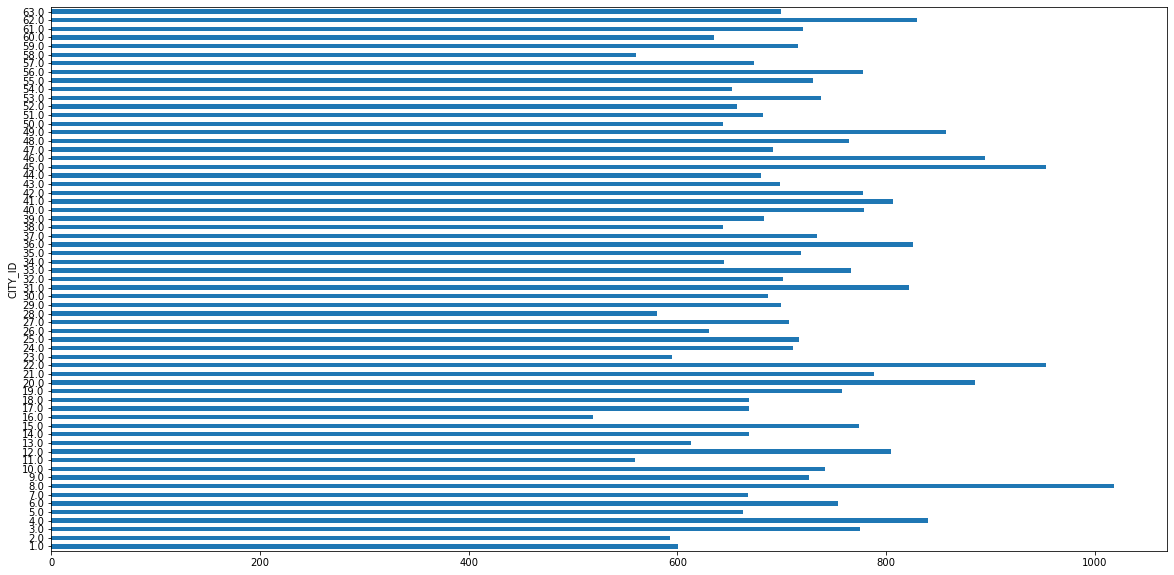

In [378]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

train_small.groupby('CITY_ID')['TRIP_TIME'].mean().plot(kind='barh')

In [382]:
train_small[~train_small['ORIGIN_STAND'].isna()]

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TRIP_TIME,START_COORD,CITY_ID
1,1372637303620000596,2,NaN,7.0,20000596,1372637303,1,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",270,"[-8.639847, 41.159826]",29.0
15,1372637610620000497,2,NaN,13.0,20000497,1372637610,1,False,"[[-8.585145,41.164857],[-8.584146,41.164704],[...",945,"[-8.585145, 41.164857]",15.0
16,1372638481620000403,2,NaN,28.0,20000403,1372638481,1,False,"[[-8.584263,41.163156],[-8.584695,41.163003],[...",960,"[-8.584263, 41.163156]",28.0
23,1372639960620000309,2,NaN,38.0,20000309,1372639960,1,False,"[[-8.60418,41.160969],[-8.603874,41.1615],[-8....",285,"[-8.60418, 41.160969]",38.0
28,1372639635620000178,2,NaN,52.0,20000178,1372639635,1,False,"[[-8.613243,41.154444],[-8.612811,41.153733],[...",255,"[-8.613243, 41.154444]",11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,1372838481620000188,2,NaN,33.0,20000188,1372838481,1,False,"[[-8.600139,41.182704],[-8.600274,41.182722],[...",795,"[-8.600139, 41.182704]",33.0
9990,1372796728620000207,2,NaN,36.0,20000207,1372796728,1,False,"[[-8.649387,41.154372],[-8.649603,41.154327],[...",555,"[-8.649387, 41.154372]",35.0
9993,1372838683620000024,2,NaN,13.0,20000024,1372838683,1,False,"[[-8.628327,41.157468],[-8.628192,41.157486],[...",885,"[-8.628327, 41.157468]",13.0
9994,1372837774620000664,2,NaN,37.0,20000664,1372837774,1,False,"[[-8.656839,41.161446],[-8.65638,41.16177],[-8...",240,"[-8.656839, 41.161446]",37.0


In [390]:
train_small['DATESTAMP'] = pd.to_datetime(train_small['TIMESTAMP'], unit='s')

In [397]:
train_small['DAY_OF_WEEK'] = train_small['DATESTAMP'].transform(lambda x: x.day_name())

In [403]:
for day in train_small['DAY_OF_WEEK'].unique():
    train_small[day] = (train_small['DAY_OF_WEEK'] == day).astype(int)

In [404]:
train_small

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,TRIP_TIME,START_COORD,CITY_ID,DATESTAMP,DAY_OF_WEEK,Monday,Tuesday,Wednesday
0,1372636858620000589,3,NaN,NaN,20000589,1372636858,1,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",330,"[-8.618643, 41.141412]",18.0,2013-07-01 00:00:58,Monday,1,0,0
1,1372637303620000596,2,NaN,7.0,20000596,1372637303,1,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",270,"[-8.639847, 41.159826]",29.0,2013-07-01 00:08:23,Monday,1,0,0
2,1372636951620000320,3,NaN,NaN,20000320,1372636951,1,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",960,"[-8.612964, 41.140359]",5.0,2013-07-01 00:02:31,Monday,1,0,0
3,1372636854620000520,3,NaN,NaN,20000520,1372636854,1,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",630,"[-8.574678, 41.151951]",55.0,2013-07-01 00:00:54,Monday,1,0,0
4,1372637091620000337,3,NaN,NaN,20000337,1372637091,1,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",420,"[-8.645994, 41.18049]",62.0,2013-07-01 00:04:51,Monday,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1372839081620000157,1,2002.0,NaN,20000157,1372839081,1,False,"[[-8.66808,41.154651],[-8.668089,41.154651],[-...",735,"[-8.66808, 41.154651]",3.0,2013-07-03 08:11:21,Wednesday,0,0,1
9996,1372839306620000084,1,2001.0,NaN,20000084,1372839306,1,False,"[[-8.583129,41.164731],[-8.583129,41.164785],[...",1035,"[-8.583129, 41.164731]",6.0,2013-07-03 08:15:06,Wednesday,0,0,1
9997,1372837509620000467,3,NaN,NaN,20000467,1372837509,1,False,"[[-8.600103,41.18274],[-8.599806,41.182722],[-...",810,"[-8.600103, 41.18274]",33.0,2013-07-03 07:45:09,Wednesday,0,0,1
9998,1372822350620000688,1,53492.0,NaN,20000688,1372822350,1,False,"[[-8.5878,41.174568],[-8.587782,41.174595],[-8...",915,"[-8.5878, 41.174568]",24.0,2013-07-03 03:32:30,Wednesday,0,0,1
